In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## outlier data

In [5]:
outlierdata=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Multiple CSV\Multiple CSV\5.outlier.csv",header=None)

In [6]:
outlierdata

0          1  2
0   -17.897000   7.662423  0
1   -26.343161  -3.055257  0
2   -19.059771  -8.531838  0
3   -16.383898  -2.352667  0
4   -12.926541   9.074994  0
..         ...        ... ..
595   4.782462 -29.002590  0
596   3.990671 -27.664533  0
597   1.968937 -27.666538  0
598   0.397395 -28.864856  0
599   2.778266 -29.555160  0

[600 rows x 3 columns]

In [8]:
fv=outlierdata.iloc[:,:2]
cv=outlierdata.iloc[:,-1]

In [10]:
cv

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: 2, Length: 600, dtype: int64

In [13]:
std=StandardScaler()
p_fv=std.fit_transform(fv)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

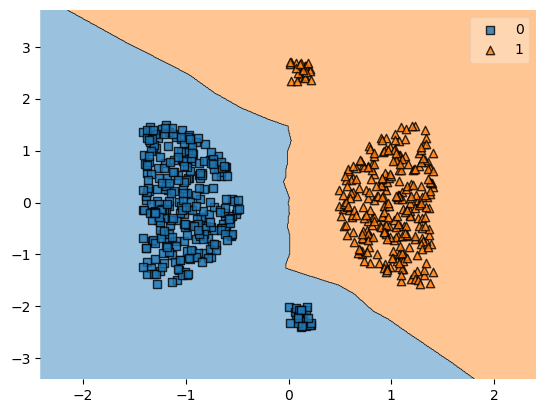

In [14]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(p_fv,cv)
plot_decision_regions(X=p_fv,y=cv.astype(int).values,clf=knn)

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, ax in zip(range(81, 92, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_fv, cv.astype(int))
    plot_decision_regions(X=p_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

## Using Accuracy method

In [17]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [18]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [20]:
k=[]
acc=[]
err=[]

for i in range(1,450,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(px_train,y_train)
    predicted=model.predict(px_test)
    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

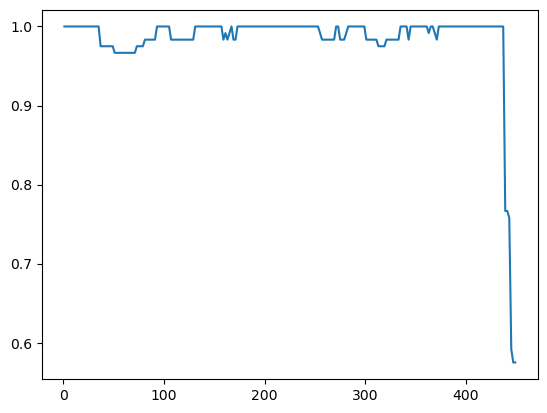

In [21]:
plt.plot(k,acc)